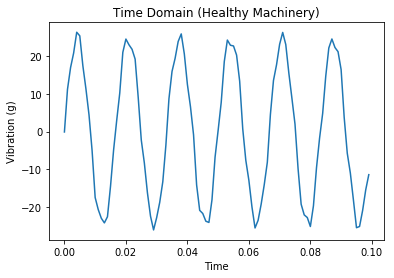

In [1]:
import numpy as np
from scipy import pi
import matplotlib.pyplot as plt
%matplotlib inline

# Sampling rate and time vector
start_time = 0 # seconds
end_time = 2 # seconds
sampling_rate = 1000 # Hz
N = (end_time - start_time)*sampling_rate # array size

# Frequency domain peaks
peak1_hz = 60 # Hz where the peak occurs
peak1_mag = 25 # magnitude of the peak
peak2_hz = 270 # Hz where the peak occurs
peak2_mag = 2 # magnitude of the peak

# Noise control
noise_loc = 0 # the Gaussian noise is mean-centered
noise_mag = 0.5 # magnitude of added noise

# Vibration data generation
time = np.linspace(start_time, end_time, N)
vib_data = peak1_mag*np.sin(2*pi*peak1_hz*time) + \
           peak2_mag*np.sin(2*pi*peak2_hz*time) + \
           np.random.normal(0, noise_mag, N) 

# Data plotting
plt.plot(time[0:100], vib_data[0:100])
plt.xlabel('Time')
plt.ylabel('Vibration (g)')
plt.title('Time Domain (Healthy Machinery)');

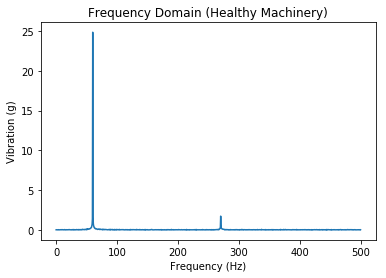

In [2]:
from scipy.fftpack import fft

# Nyquist Sampling Criteria
T = 1/sampling_rate # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# FFT algorithm
yr = fft(vib_data) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only

# Plotting the results
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');

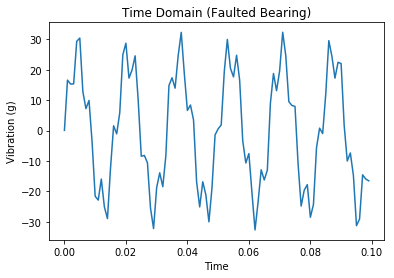

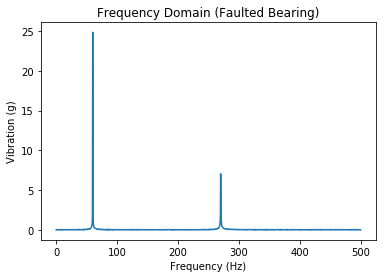

In [3]:
# Time-Domain Plot
peak2_mag2 = 8 # magnitude of the peak
vib_data2 = peak1_mag*np.sin(2*pi*peak1_hz*time) + \
            peak2_mag2*np.sin(2*pi*peak2_hz*time) + \
            np.random.normal(0, noise_mag, N) 
plt.figure()
plt.plot(time[0:100], vib_data2[0:100])
plt.xlabel('Time')
plt.ylabel('Vibration (g)')
plt.title('Time Domain (Faulted Bearing)')

# Frequency-Domain Plot
yr2 = fft(vib_data2) # "raw" FFT with both + and - frequencies
y2 = 2/N * np.abs(yr2[0:np.int(N/2)]) # positive freqs only
plt.figure()
plt.plot(x, y2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Faulted Bearing)');

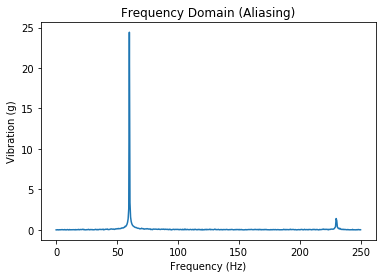

In [4]:
# Reduced sampling frequency
sampling_rate3 = 500 # Hz
N3 = (end_time - start_time)*sampling_rate3 # array size
time3 = np.linspace(start_time, end_time, N3)
vib_data3 = peak1_mag*np.sin(2*pi*peak1_hz*time3) + \
           peak2_mag*np.sin(2*pi*peak2_hz*time3) + \
           np.random.normal(0, noise_mag, N3) 
T3 = 1/sampling_rate3 # inverse of the sampling rate
x3 = np.linspace(0.0, 1.0/(2.0*T3), int(N3/2))

# FFT algorithm
yr3 = fft(vib_data3) # "raw" FFT with both + and - frequencies
y3 = 2/N3 * np.abs(yr3[0:np.int(N3/2)]) # positive freqs only

# Plotting the results
plt.plot(x3, y3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Aliasing)');